### Exercicio condução transiente 1D

Dados iniciais 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# dados de entrada
alfa = 0.0005
L = 0.25       #comprimento da barra(m)
T0 = 28        #condição t(0)
tf = 20        #tempo total
Ts = 300       #condição T(n)

Nt = 101       #subdivisão no tempo
Nx = 151       #subdivisão no espaço

t = np.linspace(0,tf,Nt)    
x = np.linspace(0,L,Nx)
dt, dx = t[1] - t[0], x[1] - x[0]

s = alfa*dt/(dx*dx)

print(dt,'\n',x)

0.2 
 [0.         0.00166667 0.00333333 0.005      0.00666667 0.00833333
 0.01       0.01166667 0.01333333 0.015      0.01666667 0.01833333
 0.02       0.02166667 0.02333333 0.025      0.02666667 0.02833333
 0.03       0.03166667 0.03333333 0.035      0.03666667 0.03833333
 0.04       0.04166667 0.04333333 0.045      0.04666667 0.04833333
 0.05       0.05166667 0.05333333 0.055      0.05666667 0.05833333
 0.06       0.06166667 0.06333333 0.065      0.06666667 0.06833333
 0.07       0.07166667 0.07333333 0.075      0.07666667 0.07833333
 0.08       0.08166667 0.08333333 0.085      0.08666667 0.08833333
 0.09       0.09166667 0.09333333 0.095      0.09666667 0.09833333
 0.1        0.10166667 0.10333333 0.105      0.10666667 0.10833333
 0.11       0.11166667 0.11333333 0.115      0.11666667 0.11833333
 0.12       0.12166667 0.12333333 0.125      0.12666667 0.12833333
 0.13       0.13166667 0.13333333 0.135      0.13666667 0.13833333
 0.14       0.14166667 0.14333333 0.145      0.14666667 

Criação da matriz 

In [3]:
A = np.zeros((Nx,Nx+1)) # Nx + 1 pois a última coluna da linha é a temperatura (é possivel fazer diferente)
T = np.zeros((Nt,Nx))
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
T[0][:] =T0             #condição inicial no tempo zero
T[0][-1] = Ts           #condição de contorno T(n)

A[0,0] = 1
A[-1][-2] = 1

for j in range(1,Nt):
    
    for i in range(1,Nx-1):
        A[i][i-1] = -s
        A[i][i] = 1 + 2*s
        A[i][i+1] = -s

for i in range(1,Nx-1):
        A[i][-1] = T0

A[-1][-1] = Ts

print('Matriz A','\n',A,2*'\n','Matriz temperatura','\n',T)

Matriz A 
 [[  1.   0.   0. ...   0.   0.   0.]
 [-36.  73. -36. ...   0.   0.  28.]
 [  0. -36.  73. ...   0.   0.  28.]
 ...
 [  0.   0.   0. ... -36.   0.  28.]
 [  0.   0.   0. ...  73. -36.  28.]
 [  0.   0.   0. ...   0.   1. 300.]] 

 Matriz temperatura 
 [[ 28.  28.  28. ...  28.  28. 300.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


Resolvendo a matriz tridiagonal

In [10]:
for j in range(1,Nt):
        
    for i in range(1,Nx-1):         # preenche novamente com os dados da matriz
        A[i][i-1] = -s
        A[i][i] = 1 + 2*s
        A[i][i+1] = -s

    A[0][-1] = T0
    A[-1][-1] = Ts
    
    
    for i in range(1,Nx-1):         # zera a parte de baixo da matriz tridiagonal
        aux = A[i][i-1]
        A[i] = A[i]/aux
        A[i] = A[i] - A[i-1]
        aux = A[i][i]
        A[i] = A[i] / aux

    for i in range(-2,-Nx,-1):      # zera a parte de cima da matriz tridiagonal
        aux = A[i][i]
        A[i] = A[i]/aux
        A[i] = A[i] - A[i+1]
        aux = A[i][i-1]
        A[i] = A[i]/aux
        
    for i,lista in enumerate(A):    # passa os resultados da matriz A para a matriz T
        T[j][i] = (lista[-1])
        
print(T[-1])

[ 28.          29.81303349  31.62606711  33.43910099  35.25213527
  37.06517007  38.87820553  40.69124177  42.50427894  44.31731715
  46.13035653  47.94339723  49.75643935  51.56948304  53.38252842
  55.19557561  57.00862475  58.82167595  60.63472933  62.44778503
  64.26084317  66.07390386  67.88696722  69.70003337  71.51310244
  73.32617453  75.13924976  76.95232824  78.76541009  80.57849541
  82.39158432  84.20467692  86.01777331  87.83087361  89.64397791
  91.45708631  93.27019892  95.08331582  96.89643712  98.70956291
 100.52269327 102.3358283  104.14896809 105.96211271 107.77526226
 109.58841681 111.40157643 113.21474122 115.02791124 116.84108656
 118.65426725 120.46745338 122.28064501 124.09384221 125.90704503
 127.72025354 129.53346778 131.34668782 133.15991369 134.97314545
 136.78638314 138.5996268  140.41287648 142.2261322  144.039394
 145.85266193 147.66593599 149.47921622 151.29250265 153.10579528
 154.91909415 156.73239927 158.54571064 160.35902828 162.17235219
 163.9856823

Plotar os gráficos

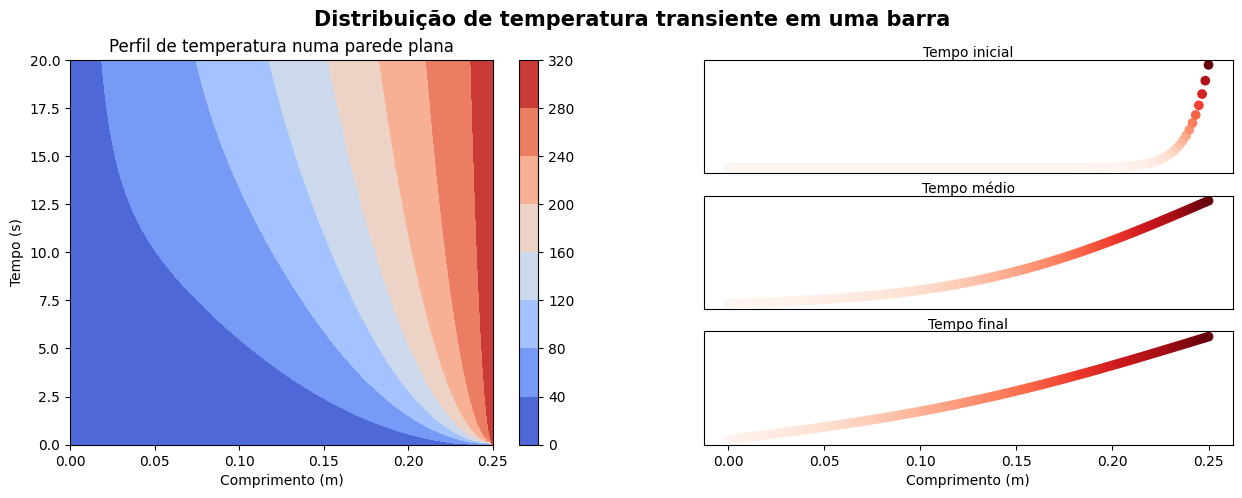

In [6]:
mosaico = "AB;AC;AD"
fig = plt.figure(figsize=(15, 5))
axs = fig.subplot_mosaic(mosaico)

# Perfil de temperatura
chart = axs['A'].contourf(x,t,T,cmap='coolwarm')
axs['A'].set_title('Perfil de temperatura numa parede plana')
axs['A'].set_ylabel('Tempo (s)')
axs['A'].set_xlabel('Comprimento (m)')

axs['B'].scatter(x,T[1],c=T[1],cmap='Reds')
axs['B'].set_title('Tempo inicial',size=10,pad=-2)
axs['B'].tick_params(axis='x', length=0)
axs['B'].set_xticks([])
axs['B'].set_yticks([])
  
i = 50
axs['C'].scatter(x,T[i],c=T[i],cmap='Reds')
axs['C'].set_title(f'Tempo médio',size=10,pad=-2)
axs['C'].tick_params(axis='y', length=0)
axs['C'].tick_params(axis='x', length=0)
axs['C'].set_xticks([])
axs['C'].set_yticks([])

axs['D'].scatter(x,T[-1],c=T[-1],cmap='Reds')
axs['D'].set_title(f'Tempo final',size=10,pad=-2)
axs['D'].set_xlabel('Comprimento (m)')
axs['D'].tick_params(axis='y', length=0)
axs['D'].set_yticks([])

fig.suptitle('Distribuição de temperatura transiente em uma barra',weight='bold',size = 15)
fig.colorbar(chart)

### Respostas anteriores (com diferentes núemros de nós)

10 nós

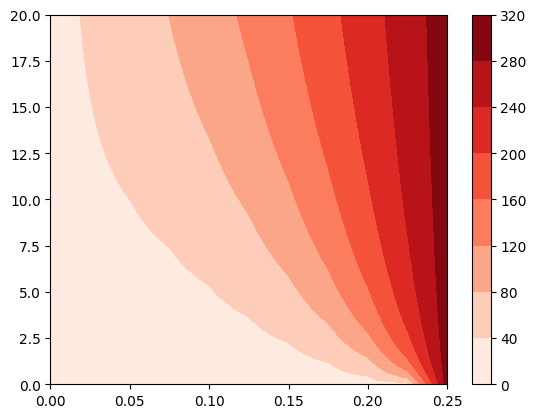

10000 nós

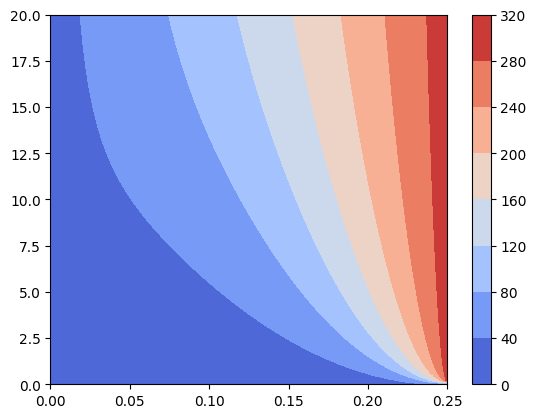